# EDA2 Assignment — Data Preprocessing, Feature Engineering & Feature Selection

**Goal:** Perform EDA, preprocessing, feature engineering, and feature selection on the Adult dataset.




In [1]:
# Step 1 — Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
import ppscore as pps


In [2]:
!pip uninstall pandas numpy -y
!pip install pandas numpy

Found existing installation: pandas 1.5.3
Uninstalling pandas-1.5.3:
  Successfully uninstalled pandas-1.5.3
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 106.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ppscore 1.3.0 requires pandas<2.0.0,>=1.0.0, but you have pandas 2.3.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.2 which is incompatible.
opencv-python 4.

## Step 2 — Load Dataset


In [2]:
# Load Adult dataset (make sure 'adult.csv' is in the same folder)
df = pd.read_csv("/content/adult_with_headers.csv")
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Step 3 — Data Exploration


In [3]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

df.describe(include="all").T


Shape: (32561, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Missing values per column:
age               0
workclass     

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital_status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 4 — Data Preprocessing: Missing Values & Scaling


In [4]:
# Fill missing numerical values with mean
for col in df.select_dtypes(include=['int64','float64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill missing categorical values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Scaling
scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

num_cols = df.select_dtypes(include=['int64','float64']).columns
df_std = df.copy()
df_std[num_cols] = scaler_std.fit_transform(df[num_cols])

df_minmax = df.copy()
df_minmax[num_cols] = scaler_minmax.fit_transform(df[num_cols])

df_std.head()


/tmp/ipython-input-2846567632.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-2846567632.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K


## Step 5 — Encoding Categorical Variables


In [5]:
cat_cols = df.select_dtypes(include=['object']).columns

df_encoded = df.copy()
for col in cat_cols:
    if df[col].nunique() <= 5:
        df_encoded = pd.get_dummies(df_encoded, columns=[col], prefix=[col])
    else:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,77516,9,13,4,1,1,2174,0,...,39,False,False,False,False,True,False,True,True,False
1,50,6,83311,9,13,2,4,0,0,0,...,39,False,False,False,False,True,False,True,True,False
2,38,4,215646,11,9,0,6,1,0,0,...,39,False,False,False,False,True,False,True,True,False
3,53,4,234721,1,7,2,6,0,0,0,...,39,False,False,True,False,False,False,True,True,False
4,28,4,338409,9,13,2,10,5,0,0,...,5,False,False,True,False,False,True,False,True,False


## Step 6 — Feature Engineering


In [7]:
# Create new features
df_encoded['age_bin'] = pd.cut(df['age'], bins=[0,25,45,65,100], labels=['Young','Adult','Senior','Old'])
df_encoded['hours_category'] = pd.cut(df['hours_per_week'], bins=[0,25,40,60,100], labels=['Low','Medium','High','Very High'])

# Log transformation for skewed feature
df_encoded['capital-gain-log'] = np.log1p(df['capital_gain'])

df_encoded[['age','age_bin','hours_per_week','hours_category','capital_gain','capital-gain-log']].head()

,age,age_bin,hours_per_week,hours_category,capital_gain,capital-gain-log
0,39,Adult,40,Medium,2174,7.684784
1,50,Senior,13,Low,0,0.000000
2,38,Adult,40,Medium,0,0.000000
3,53,Senior,40,Medium,0,0.000000
4,28,Adult,40,Medium,0,0.000000


## Step 7 — Feature Selection (Isolation Forest & PPS)


In [8]:
# Isolation Forest for outlier detection
iso = IsolationForest(contamination=0.05, random_state=42)
df_encoded['outlier'] = iso.fit_predict(df_encoded.select_dtypes(include=['int64','float64']))

print("Outliers detected:", (df_encoded['outlier'] == -1).sum())

# PPS (Predictive Power Score)
pps_matrix = pps.matrix(df_encoded)
pps_matrix.head()


Outliers detected: 1628


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.0,predict_itself,True,None,0.0000,1.000000,None
1,age,workclass,0.0,regression,True,mean absolute error,0.7426,0.875681,DecisionTreeRegressor()
2,age,fnlwgt,0.0,regression,True,mean absolute error,75872.1862,77535.141544,DecisionTreeRegressor()
3,age,education,0.0,regression,True,mean absolute error,2.7590,2.806164,DecisionTreeRegressor()
4,age,education_num,0.0,regression,True,mean absolute error,1.8530,1.898306,DecisionTreeRegressor()


## Step 8 — Compare PPS vs Correlation


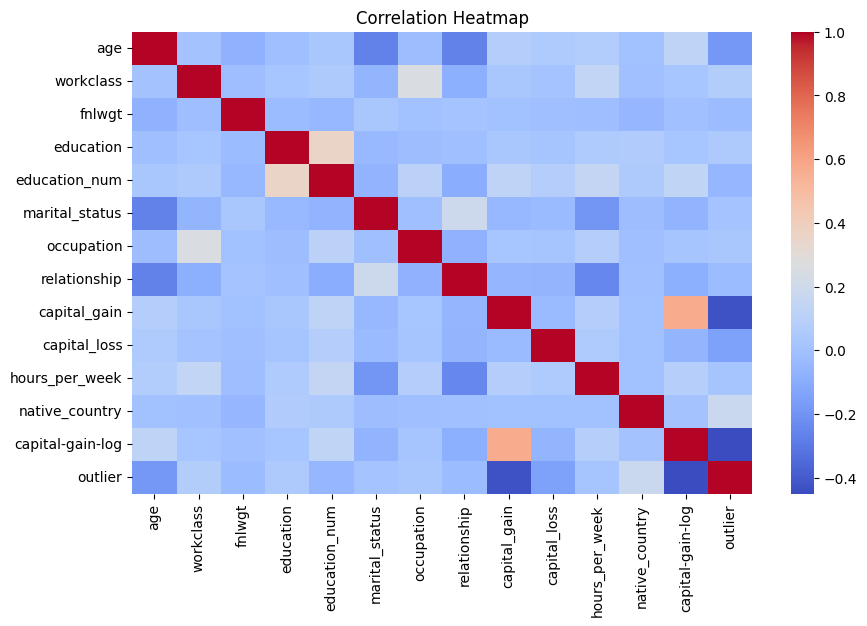

,x,y,ppscore
624,outlier,outlier,1.0
598,capital-gain-log,capital-gain-log,1.0
26,workclass,workclass,1.0
21,age,age_bin,1.0
572,hours_category,hours_category,1.0
546,age_bin,age_bin,1.0
520,income_ >50K,income_ >50K,1.0
519,income_ >50K,income_ <=50K,1.0
495,income_ <=50K,income_ >50K,1.0
494,income_ <=50K,income_ <=50K,1.0


In [10]:
plt.figure(figsize=(10,6))
# Select only numerical columns before computing correlation
numerical_df_encoded = df_encoded.select_dtypes(include=np.number)
sns.heatmap(numerical_df_encoded.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

pps_matrix_filtered = pps_matrix[['x','y','ppscore']]
pps_matrix_filtered.sort_values(by='ppscore', ascending=False).head(10)

## Step 9 — Conclusion

- Handled missing values using mean for numerical and mode for categorical.  
- Applied StandardScaler and MinMaxScaler.  
- Used One-Hot Encoding and Label Encoding.  
- Created new features (`age_bin`, `hours_category`) and applied log transformation.  
- Performed outlier detection with Isolation Forest.  
- Used PPS to find predictive relationships beyond correlation.  
- Compared PPS with correlation matrix for feature selection.  
